In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

N = 10
w = 1 * 2 * np.pi 
F0 = 0.5

a = destroy(N)
H0 = w * (a*a.dag() + 0.5)
x = a+a.dag()
H1 = F0 * x

# The first argument should be 't', and the second one is "args" (not sure
# what 'args' does but it needs to be there even if you don't use it...)
def f(t, args):
    return np.cos(w*t)

psi0 = fock(N,0)

# We will not include any c_ops, which means we are just
# simulating the Schroedinger equation
c_ops = [] 

t = np.linspace(0,5,100)

# For time dependent Hamiltonians, we create a list that includes first 
# H0 as the first entry, then a list as the second entry that includes 
# H1 and then the name of the function f(t)

H = [H0, [H1, f]]

result = mesolve(H, psi0, t, c_ops)


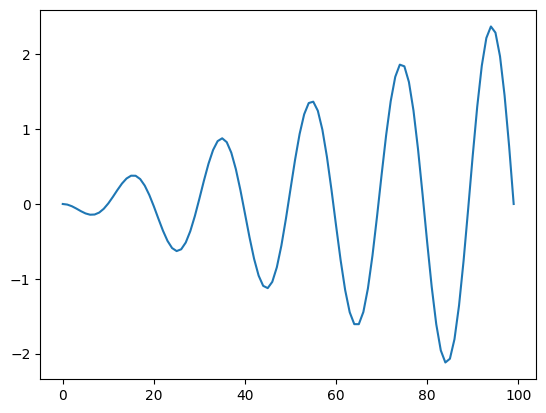

In [2]:
plt.plot(expect(x,result.states))